In [12]:
import os
import time
import tejapi
import talib as ta
from talib import abstract
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
from datetime import timedelta
import configparser
import re
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
from initialize import ML_stock
from select_1 import column, sample, feature

In [3]:
ml_stock = ML_stock()
ml_stock.ini()
start = '2012-07-01'
end = '2022-07-01'

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = ml_stock.get_fundamental(start, end, sample[1], column)

/Users/chencongyao/anaconda3/envs/tq/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Currently used TEJ API key call quota 242/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 4041756/9223372036854775807 (0.0%)


In [6]:
df

,coid,mdate,Volume_1000_Shares,Low,High,Open,Close,Return_Rate_on_Equity_A_percent_A,Return_Rate_on_Equity_A_percent_Q,Return_Rate_on_Equity_A_percent_TTM
0,2618,2012-07-02,10091.0,17.75,18.00,18.00,17.75,-1.48,-1.48,-1.34
1,2618,2012-07-03,8067.0,17.75,18.05,17.80,17.80,-1.48,-1.48,-1.34
2,2618,2012-07-04,15527.0,17.40,17.70,17.65,17.55,-1.48,-1.48,-1.34
3,2618,2012-07-05,9789.0,17.65,17.90,17.70,17.70,-1.48,-1.48,-1.34
4,2618,2012-07-06,9130.0,17.55,17.85,17.70,17.60,-1.48,-1.48,-1.34
...,...,...,...,...,...,...,...,...,...,...
2448,2618,2022-06-27,114474.0,30.90,31.85,31.00,31.20,3.63,3.63,14.25
2449,2618,2022-06-28,75651.0,30.20,31.25,31.20,31.20,3.63,3.63,14.25
2450,2618,2022-06-29,88193.0,30.40,31.60,30.80,31.60,3.63,3.63,14.25
2451,2618,2022-06-30,123873.0,31.20,32.15,31.70,31.65,3.63,3.63,14.25


In [7]:
df = ml_stock.get_fundamental(start, end, [sample[1]], column)
df = ml_stock.calculate_all_technical_indicators(df)
preporc_data = ml_stock.preprocessing(df)

Currently used TEJ API key call quota 242/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 4041756/9223372036854775807 (0.0%)


In [8]:
preporc_data

,coid,mdate,volume,low,high,open,close,Return_Rate_on_Equity_A_percent_Q,MOM,RSI
0,2618,2012-07-02,10091.0,17.75,18.00,18.00,17.75,-1.48,0.00,0.000000
1,2618,2012-07-03,8067.0,17.75,18.05,17.80,17.80,-1.48,0.00,0.000000
2,2618,2012-07-04,15527.0,17.40,17.70,17.65,17.55,-1.48,0.00,0.000000
3,2618,2012-07-05,9789.0,17.65,17.90,17.70,17.70,-1.48,0.00,0.000000
4,2618,2012-07-06,9130.0,17.55,17.85,17.70,17.60,-1.48,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...
2429,2618,2022-06-27,114474.0,30.90,31.85,31.00,31.20,3.63,-1.45,45.516330
2430,2618,2022-06-28,75651.0,30.20,31.25,31.20,31.20,3.63,-1.15,45.516330
2431,2618,2022-06-29,88193.0,30.40,31.60,30.80,31.60,3.63,-0.50,47.604017
2432,2618,2022-06-30,123873.0,31.20,32.15,31.70,31.65,3.63,0.20,47.872896


In [9]:
data = preporc_data.drop(columns=['mdate', 'coid'])
data

,volume,low,high,open,close,Return_Rate_on_Equity_A_percent_Q,MOM,RSI
0,10091.0,17.75,18.00,18.00,17.75,-1.48,0.00,0.000000
1,8067.0,17.75,18.05,17.80,17.80,-1.48,0.00,0.000000
2,15527.0,17.40,17.70,17.65,17.55,-1.48,0.00,0.000000
3,9789.0,17.65,17.90,17.70,17.70,-1.48,0.00,0.000000
4,9130.0,17.55,17.85,17.70,17.60,-1.48,0.00,0.000000
...,...,...,...,...,...,...,...,...
2429,114474.0,30.90,31.85,31.00,31.20,3.63,-1.45,45.516330
2430,75651.0,30.20,31.25,31.20,31.20,3.63,-1.15,45.516330
2431,88193.0,30.40,31.60,30.80,31.60,3.63,-0.50,47.604017
2432,123873.0,31.20,32.15,31.70,31.65,3.63,0.20,47.872896


In [15]:
def create_dataset(df, window_size=5):
    df = data
    features = df[feature].values
    
    target = df['close'].shift(-1).values  # y變量為隔日收盤價
    target[-1] = target[-2]

    scaler = StandardScaler()
    features = scaler.fit_transform(features)
    t_scaler = StandardScaler()
    target = t_scaler.fit_transform(target.reshape(-1, 1))

    X, y = [], []
    for i in range(len(df) - window_size):
        X.append(features[i:i + window_size])
        y.append(target[i + window_size])

    return np.array(X), np.array(y), t_scaler

In [16]:
X, y, t_scaler = create_dataset(data, 5)

In [17]:
X.shape

(2429, 5, 8)

In [18]:
y.shape

(2429, 1)

In [19]:
split_train = int(len(X) * 0.8)
split_val = int(len(X) * 0.9)
X_train = X[:split_train]
X_val = X[split_train:split_val]
X_test = X[split_val:]

y_train = y[:split_train]
y_val = y[split_train:split_val]
y_test = y[split_val:]

In [20]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
# from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay

model = Sequential([layers.Input((X_train.shape[1], X_train.shape[2])),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    Dropout(0.2),
                    layers.Dense(32, activation='relu'),
                    Dropout(0.2),
                    layers.Dense(1),
                ])

lr_schedule = ExponentialDecay(
    0.001,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True)
model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mse', metrics=['mae'])

# model.compile(loss='mse',
#               optimizer=Adam(learning_rate=0.001),
#               metrics=['mean_absolute_error'])

model.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, callbacks=early_stopping, batch_size=32)
# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, callbacks=early_stopping)
# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,857 (85.38 KB)

 Trainable params: 21,857 (85.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1747 - mae: 0.3091 - val_loss: 0.0587 - val_mae: 0.1944
Epoch 2/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0373 - mae: 0.1324 - val_loss: 0.0451 - val_mae: 0.1574
Epoch 3/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0302 - mae: 0.1195 - val_loss: 0.0535 - val_mae: 0.1786
Epoch 4/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0253 - mae: 0.1133 - val_loss: 0.0534 - val_mae: 0.1624
Epoch 5/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0216 - mae: 0.1022 - val_loss: 0.0451 - val_mae: 0.1549
Epoch 6/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0209 - mae: 0.1012 - val_loss: 0.0452 - val_mae: 0.1580
Epoch 7/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0209 - mae: 0.1006 - val_loss: 0.0420 - val_mae: 0.1499
Epoch 8/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0198 - mae: 0.0964 - val_loss: 0.0382 - val_mae: 0.1353
Epoch 9/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.020

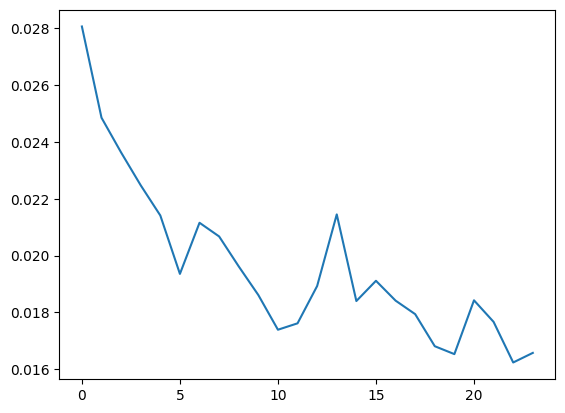

In [21]:
loss_per_epoch = model.history.history['loss']
cut = 2
plt.plot(range(len(loss_per_epoch) - cut), loss_per_epoch[cut:])
plt.show()

In [22]:
y_result = []
y_result = np.append(y_result, model.predict(X_train).flatten())
y_result = np.append(y_result, model.predict(X_val).flatten())
y_result = np.append(y_result, model.predict(X_test).flatten())
y_result, y_result.shape

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step


(array([0.03510731, 0.03302659, 0.03564086, ..., 1.78315282, 1.79589212,
        1.83629072]),
 (2429,))

In [23]:
y_final = t_scaler.inverse_transform(y_result.reshape(-1, 1)).T
y_final, y_final.shape

(array([[17.15254849, 17.14323463, 17.15493681, ..., 24.97728117,
         25.03430579, 25.21514103]]),
 (1, 2429))

In [24]:
dates = preporc_data.loc[5:, 'mdate'].values
dates_train = dates[:split_train]
dates_val = dates[split_train:split_val]
dates_test = dates[split_val:]

In [25]:
train_predictions = y_final[0][0 : len(dates_train)]
val_predictions = y_final[0][len(dates_train): len(dates_train)+len(dates_val)]
test_predictions = y_final[0][len(dates_train)+len(dates_val) : ]

In [26]:
y_final[0].shape

(2429,)

In [27]:
y_train_unscaled = t_scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_unscaled = t_scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_unscaled = t_scaler.inverse_transform(y_test.reshape(-1, 1))

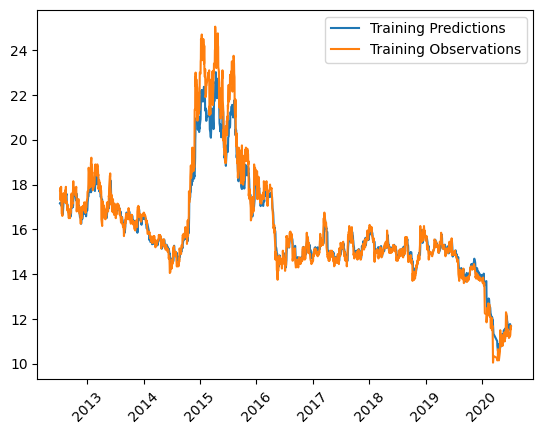

In [28]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train_unscaled)
plt.legend(['Training Predictions', 'Training Observations'])
plt.xticks(rotation = 45)
plt.show()

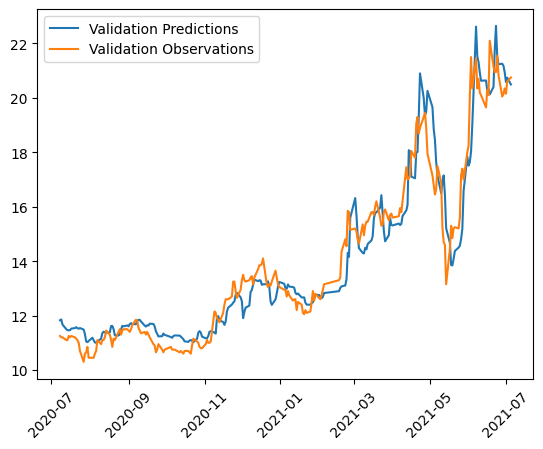

In [29]:
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val_unscaled)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.xticks(rotation = 45)
plt.show()

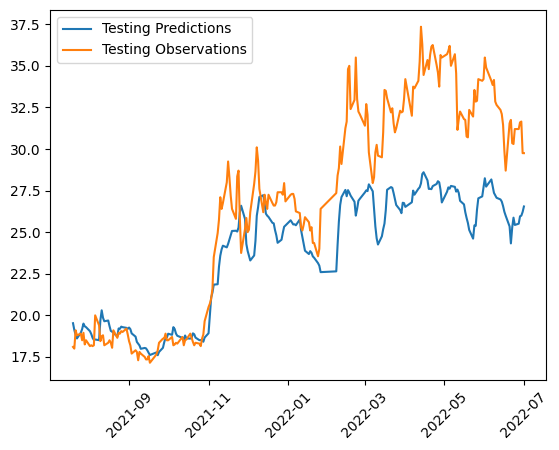

In [30]:
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test_unscaled)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.xticks(rotation = 45)
plt.show()

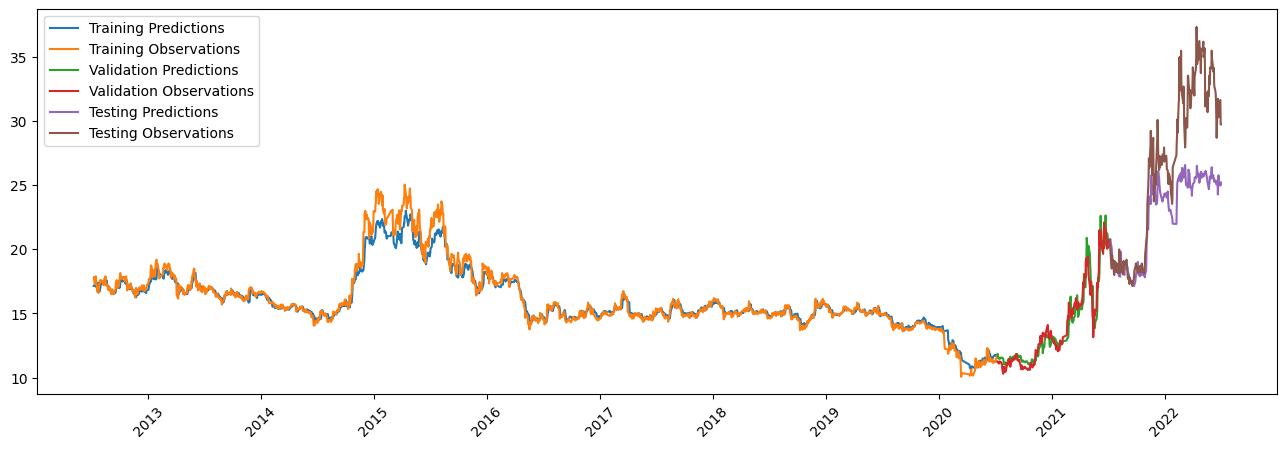

In [30]:
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(5)
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, t_scaler.inverse_transform(y_train.reshape(-1, 1)))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, t_scaler.inverse_transform(y_val.reshape(-1, 1)))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, t_scaler.inverse_transform(y_test.reshape(-1, 1)))
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])
plt.xticks(rotation = 45)
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step


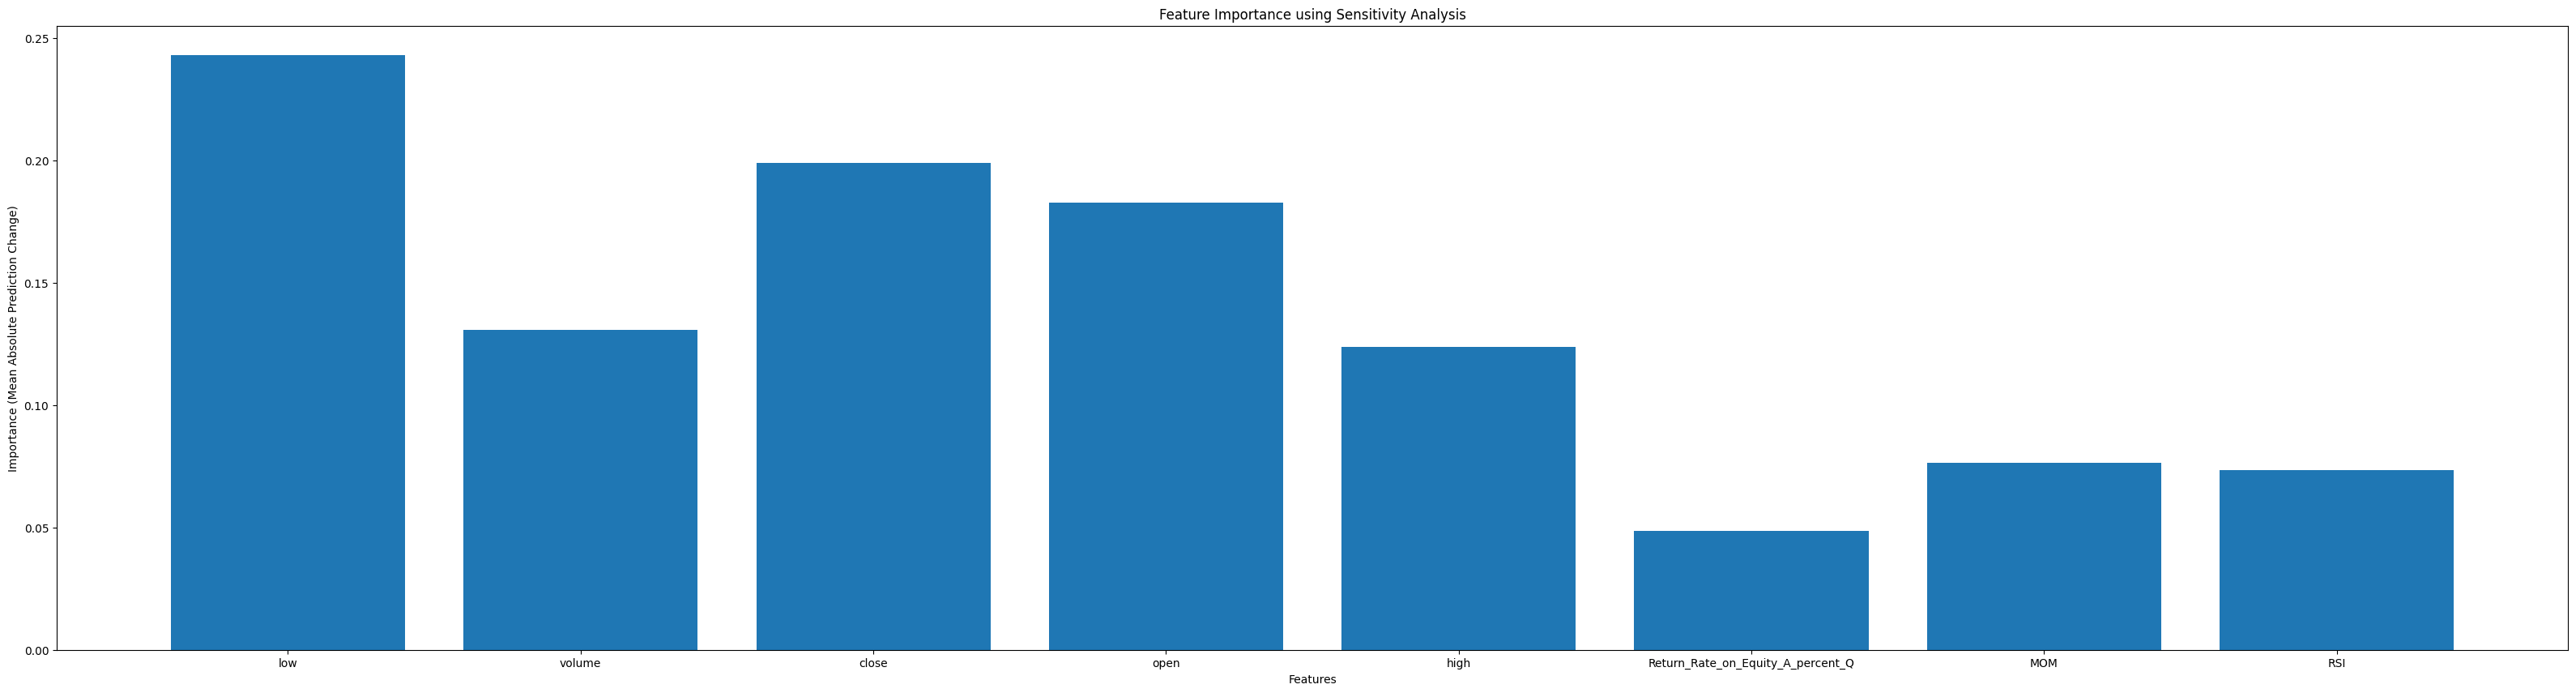

In [31]:
def analyze_feature_importance(model, X, num_samples=1000):
    if not isinstance(X, np.ndarray):
        X = X.to_numpy()
    
    # 隨機選擇樣本
    if X.shape[0] > num_samples:
        indices = np.random.choice(X.shape[0], num_samples, replace=False)
        X = X[indices]
    
    # 獲取預測
    baseline_pred = model.predict(X)
    
    importances = []
    
    # 擾動每個特徵
    for feature_idx in range(X.shape[2]):
        # 建立擾動數據
        X_perturbed = X.copy()
        X_perturbed[:, :, feature_idx] = np.random.permutation(X_perturbed[:, :, feature_idx])
        
        # 獲取擾動後的預測
        perturbed_pred = model.predict(X_perturbed)
        
        # 計算預測變化的平均絕對值
        importance = np.mean(np.abs(perturbed_pred - baseline_pred))
        importances.append(importance)
    
    return importances

def plot_feature_importance(model, X):
    importances = analyze_feature_importance(model, X)
    
    feature_names = feature
    
    plt.figure(figsize=(40, 10))
    plt.bar(feature_names, importances)
    plt.title('Feature Importance using Sensitivity Analysis')
    plt.xlabel('Features')
    plt.ylabel('Importance (Mean Absolute Prediction Change)')
    plt.show()

plot_feature_importance(model, X_test)

In [32]:
from scipy.signal import savgol_filter

rolling_df = pd.DataFrame({
    'Date': dates_test,
    'Predictions': test_predictions,
    'Observations': y_test_unscaled.reshape(-1)
})
rolling_df.set_index('Date', inplace=True)

In [33]:
rolling_df['SMA2'] = rolling_df['Predictions'].rolling(window=2).mean()
rolling_df['SMA20'] = rolling_df['Predictions'].rolling(window=20).mean()
rolling_df['SG_filter'] = savgol_filter(rolling_df['Predictions'], window_length=15, polyorder=3)

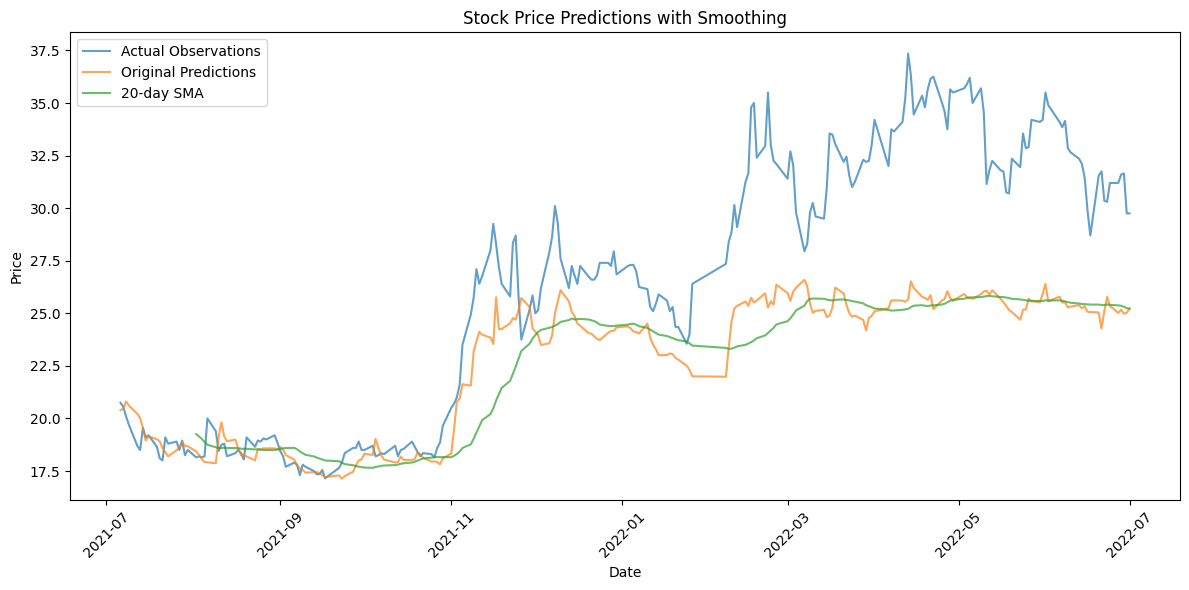

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(rolling_df.index, rolling_df['Observations'], label='Actual Observations', alpha=0.7)
plt.plot(rolling_df.index, rolling_df['Predictions'], label='Original Predictions', alpha=0.7)
# plt.plot(rolling_df.index, rolling_df['SMA2'], label='2-day SMA', alpha=0.7)
plt.plot(rolling_df.index, rolling_df['SMA20'], label='20-day SMA', alpha=0.7)
# plt.plot(rolling_df.index, rolling_df['SG_filter'], label='Savitzky-Golay Filter', alpha=0.7)

plt.title('Stock Price Predictions with Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
model.save(f'lstm_{sample[0]}.keras', include_optimizer = False)